# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | First the good news, the clu..."
1,✅ Trip Verified | I have never travelled wit...
2,"✅ Trip Verified | Terrible overall, medium ser..."
3,✅ Trip Verified | London Heathrow to Male In...
4,Not Verified | Very good flight following an ...


In [8]:
import os

data_dir = "data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Created directory: {data_dir}")
else:
    print(f"Directory already exists: {data_dir}")

print(f"Permissions: {os.stat(data_dir).st_mode}")


Directory already exists: data
Permissions: 16895


In [24]:
#Save raw data to CSV
df = pd.DataFrame({'reviews': reviews})
df.to_csv("data/BA_reviews.csv", index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [31]:
import re 
#data cleaning 
def clean_text(text):
    text = re.sub(r'✅ Trip Verified', '', text)  #Remove unnecessary text
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  #Remove special characters
    text = text.lower().strip()  #Convert to lowercase & strip whitespace
    return text

df["cleaned_reviews"] = df["reviews"].apply(clean_text)
df.to_csv("data/BA_reviews_cleaned.csv", index=False)

In [33]:
# Data Cleaning
def clean_text(text):
    text = re.sub(r'✅ Trip Verified', '', text)  # Remove unnecessary text
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase & strip whitespace
    return text

df["cleaned_reviews"] = df["reviews"].apply(clean_text)
df.to_csv("data/BA_reviews_cleaned.csv", index=False)

In [45]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 5.7 MB/s eta 0:00:00


In [53]:
!pip install wordcloud

In [55]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [56]:
#Sentiment Analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df["sentiment"] = df["cleaned_reviews"].apply(get_sentiment)
df.to_csv("data/BA_reviews_sentiment.csv", index=False)

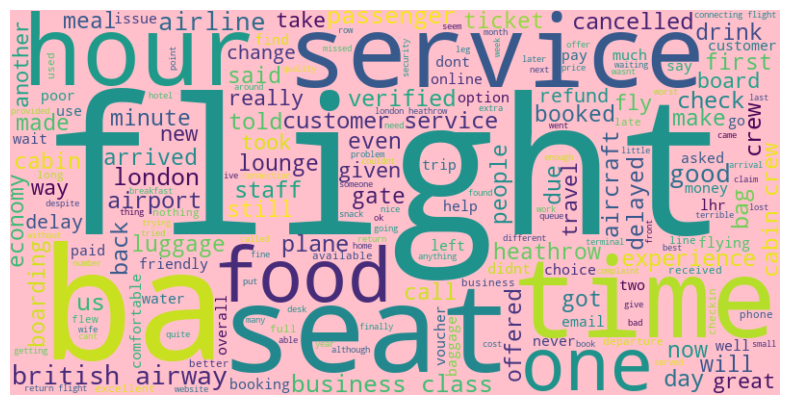

In [61]:
# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='pink').generate(" ".join(df["cleaned_reviews"]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
# Topic Modeling (LDA)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df["cleaned_reviews"])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [65]:
# Display Topics
words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx+1}:")
    print(" ".join([words[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

Topic 1:
ba class business service flight seat airlines seats airline economy

Topic 2:
flight ba british airways customer service hours london told cancelled

Topic 3:
flight staff ba crew plane gate passengers time boarding hour

Topic 4:
club flight lounge good time food service boarding arrival minutes

Topic 5:
flight seat good ba food crew seats cabin service business



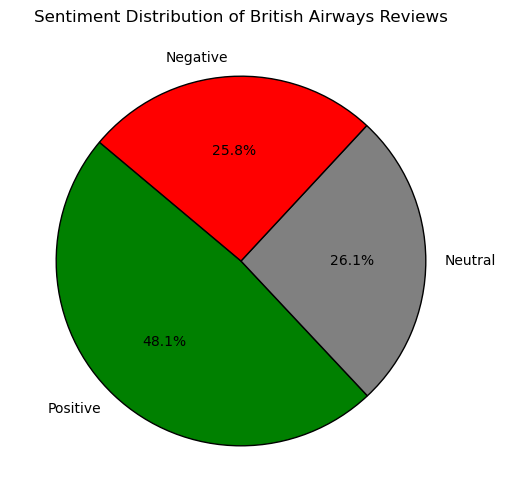

C:\Users\ZEYNEP\AppData\Local\Temp\ipykernel_32000\554037880.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Word", data=word_df, palette="viridis")


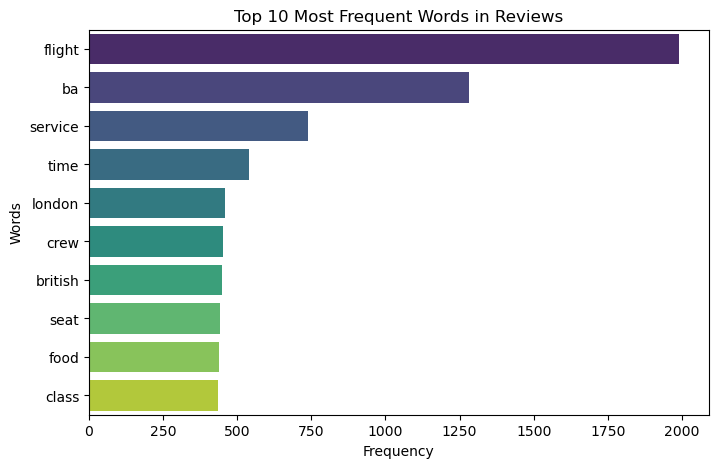

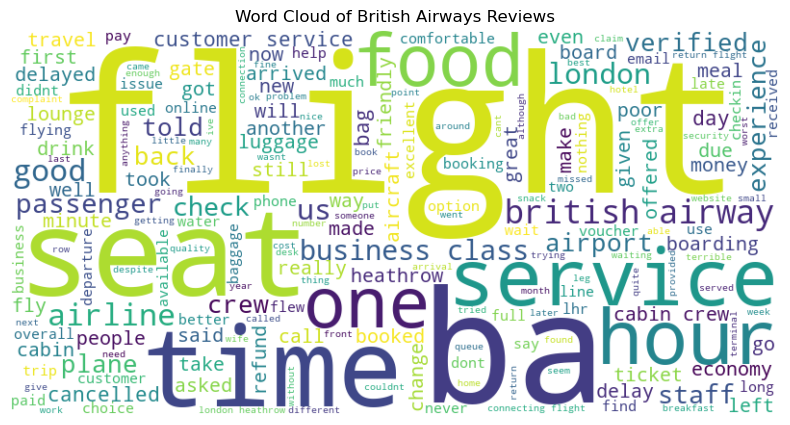

Topic 1: flight london service ba time british seat food crew class
Topic 2: class seat food service ba london flight time crew british
Topic 3: ba flight time service london food seat crew class british
Topic 4: crew food flight service time seat ba london class british
Topic 5: british service time london flight ba food seat class crew


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load cleaned data
df = pd.read_csv("data/BA_reviews_sentiment.csv")

#SENTIMENT CATEGORIZATION
def classify_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["sentiment"].apply(classify_sentiment)

# Sentiment Dsitribution (Pie Chart)
plt.figure(figsize=(6, 6))
df["Sentiment"].value_counts().plot.pie(
    autopct="%1.1f%%", colors=["green", "gray", "red"], startangle=140, wedgeprops={"edgecolor": "black"}
)
plt.title("Sentiment Distribution of British Airways Reviews")
plt.ylabel("")
plt.savefig("sentiment_pie_chart.png")  # Save for PowerPoint
plt.show()

#Most Frequent Words (Bar Chart)
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(df["cleaned_reviews"].dropna())
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

#Convert to DataFrame for visualization
word_df = pd.DataFrame({"Word": words, "Count": word_counts}).sort_values(by="Count", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Count", y="Word", data=word_df, palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 10 Most Frequent Words in Reviews")
plt.savefig("word_frequency_bar_chart.png")  # Save for PowerPoint
plt.show()

# Common words - Using word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(" ".join(df["cleaned_reviews"]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of British Airways Reviews")
plt.savefig("wordcloud.png")  # Save for PowerPoint
plt.show()

#Topic Modelling (DLA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display Topics
words = vectorizer.get_feature_names_out()
topic_words = []
for topic_idx, topic in enumerate(lda.components_):
    top_words = " ".join([words[i] for i in topic.argsort()[:-10 - 1:-1]])
    topic_words.append(f"Topic {topic_idx+1}: {top_words}")

# Print topic keywords
for topic in topic_words:
    print(topic)

# Save topics for PowerPoint
with open("topics.txt", "w") as f:
    for topic in topic_words:
        f.write(topic + "\n")
